In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('bitcoins_data.csv')

In [3]:
data.shape

(2824, 7)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
x = data.iloc[:,[0,1,2,3]]
y = data.iloc[:,[4]]


In [5]:
x

,Date,Open,High,Low
0,2014-09-17,465.864014,468.174011,452.421997
1,2014-09-18,456.859985,456.859985,413.104004
2,2014-09-19,424.102997,427.834991,384.532013
3,2014-09-20,394.673004,423.295990,389.882996
4,2014-09-21,408.084991,412.425995,393.181000
...,...,...,...,...
2819,2022-06-06,29910.283203,31693.291016,29894.187500
2820,2022-06-07,31371.742188,31489.683594,29311.683594
2821,2022-06-08,31151.480469,31253.691406,29944.404297
2822,2022-06-09,30215.279297,30609.310547,30020.265625


In [6]:
x.describe()

,Open,High,Low
count,2824.000000,2824.000000,2824.000000
mean,12349.518667,12671.614363,11991.470201
std,16637.334144,17067.684166,16140.450253
min,176.897003,211.731003,171.509995
25%,624.307495,631.269501,616.852264
50%,6504.954834,6612.206787,6409.613281
75%,11368.220947,11616.416504,11063.500244
max,67549.734375,68789.625000,66382.062500


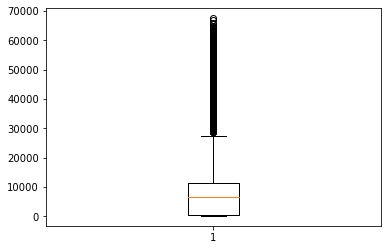

In [11]:
plt.boxplot(y)
plt.show()

In [7]:
correlations = x.corr(method='pearson')
correlations

,Open,High,Low
Open,1.000000,0.999530,0.999129
High,0.999530,1.000000,0.999056
Low,0.999129,0.999056,1.000000


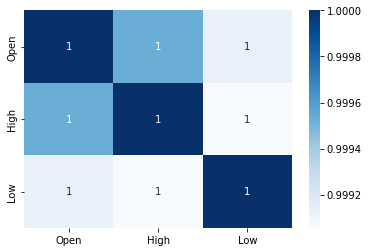

Wall time: 296 ms


In [12]:
%%time
sb.heatmap(correlations, annot=True, cmap='Blues')
plt.show()

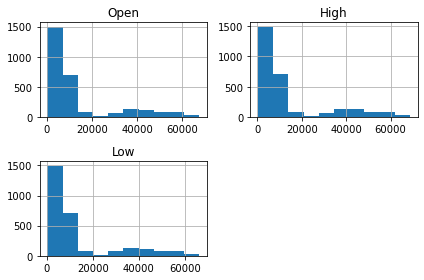

In [9]:
x.hist()
plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import Normalizer

In [10]:
normalizer = Normalizer(norm='l1').fit(x)
x = normalizer.transform(x)

In [11]:
from sklearn.model_selection import train_test_split


In [16]:
x_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2
)

In [17]:
from sklearn.neighbors import KNeighborsRegressor as knr

In [18]:
%%time
neighbours = knr(n_neighbors=3)
neighbours.fit(x_train,y_train)

Wall time: 2.97 ms


KNeighborsRegressor(n_neighbors=3)

In [19]:
y_pred = neighbours.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error as mse

In [36]:
error = mse(y_test, y_pred)
error

208525382.6748104

In [37]:
y_pred

array([[ 9897.06901042],
       [24655.77864583],
       [23925.00748698],
       [ 8775.5694987 ],
       [  504.35400391],
       [33780.41601562],
       [10413.2360026 ],
       [  459.32698568],
       [ 8198.6640625 ],
       [ 5255.92667643],
       [ 9116.58740234],
       [ 6326.20369466],
       [ 6843.68863932],
       [23621.37654622],
       [ 8274.84667969],
       [10139.36848958],
       [  544.39401245],
       [30155.34179688],
       [26416.60286458],
       [  248.13066101],
       [  711.7926534 ],
       [  590.91033936],
       [29815.67431641],
       [17060.56901042],
       [34827.51074219],
       [30185.72835286],
       [12733.93001302],
       [  376.43466187],
       [  333.31666056],
       [  374.16733805],
       [  504.35400391],
       [20967.33024089],
       [37341.54785156],
       [19038.1640625 ],
       [20584.17211914],
       [ 1889.92563883],
       [ 1029.89135742],
       [  369.82166545],
       [10693.38069661],
       [  552.90266927],


In [38]:
y_test

,Close
2288,23783.029297
2504,37337.535156
1203,14982.099609
1965,9293.521484
727,609.241028
...,...
396,261.643005
1707,7963.327637
395,270.640015
2083,9461.058594
